In [4]:
import pandas as pd
from download import download_get

parties_file = download_get('https://election-results.eu/data-sheets/csv/2019-2024/election-results/parties.csv')
parties = pd.read_csv(parties_file, sep=';')
parties = parties[parties['DIVISION_ID'] == 'DE']
parties = parties.set_index('ID').dropna(axis='columns')
parties

,DIVISION_ID,TYPE,ACRONYM,LABEL
ID,,,,
DE01,DE,PARTY,CDU - CSU,Christlich Demokratische Union Deutschlands / ...
DE02,DE,PARTY,SPD,Sozialdemokratische Partei Deutschlands
DE03,DE,PARTY,GRÜNE,Bündnis 90/Die Grünen
DE04,DE,PARTY,DIE LINKE,DIE LINKE
DE05,DE,PARTY,AfD,Alternative für Deutschland
DE06,DE,PARTY,FDP,Freie Demokratische Partei
DE07,DE,PARTY,FREIE WÄHLER,FREIE WÄHLER
DE08,DE,PARTY,PIRATEN,Piratenpartei Deutschland
DE09,DE,PARTY,Tierschutzpartei,PARTEI MENSCH UMWELT TIERSCHUTZ


In [2]:
results_file = download_get('https://election-results.eu/data-sheets/csv/2019-2024/election-results/results-parties/results-parties-de.csv')
results = pd.read_csv('data/results-parties-de.csv', sep=";")
results = results.set_index('PARTY_ID')
results

,TYPE,VOTES_PERCENT,UPDATE_STATUS,UPDATE_TIME
PARTY_ID,,,,
DE01,PARTY,28.9,FINAL,2019-05-27 10:18
DE02,PARTY,15.8,FINAL,2019-05-27 10:18
DE03,PARTY,20.5,FINAL,2019-05-27 10:18
DE04,PARTY,5.5,FINAL,2019-05-27 10:18
DE05,PARTY,11.0,FINAL,2019-05-27 10:18
DE06,PARTY,5.4,FINAL,2019-05-27 10:18
DE07,PARTY,2.2,FINAL,2019-05-27 10:18
DE08,PARTY,0.7,FINAL,2019-05-27 10:18
DE09,PARTY,1.4,FINAL,2019-05-27 10:18


In [34]:
party_results = parties.join(results, rsuffix='_result')
del party_results['TYPE_result']
party_results

,DIVISION_ID,TYPE,ACRONYM,LABEL,VOTES_PERCENT,UPDATE_STATUS,UPDATE_TIME
ID,,,,,,,
DE01,DE,PARTY,CDU - CSU,Christlich Demokratische Union Deutschlands / ...,28.9,FINAL,2019-05-27 10:18
DE02,DE,PARTY,SPD,Sozialdemokratische Partei Deutschlands,15.8,FINAL,2019-05-27 10:18
DE03,DE,PARTY,GRÜNE,Bündnis 90/Die Grünen,20.5,FINAL,2019-05-27 10:18
DE04,DE,PARTY,DIE LINKE,DIE LINKE,5.5,FINAL,2019-05-27 10:18
DE05,DE,PARTY,AfD,Alternative für Deutschland,11.0,FINAL,2019-05-27 10:18
DE06,DE,PARTY,FDP,Freie Demokratische Partei,5.4,FINAL,2019-05-27 10:18
DE07,DE,PARTY,FREIE WÄHLER,FREIE WÄHLER,2.2,FINAL,2019-05-27 10:18
DE08,DE,PARTY,PIRATEN,Piratenpartei Deutschland,0.7,FINAL,2019-05-27 10:18
DE09,DE,PARTY,Tierschutzpartei,PARTEI MENSCH UMWELT TIERSCHUTZ,1.4,FINAL,2019-05-27 10:18


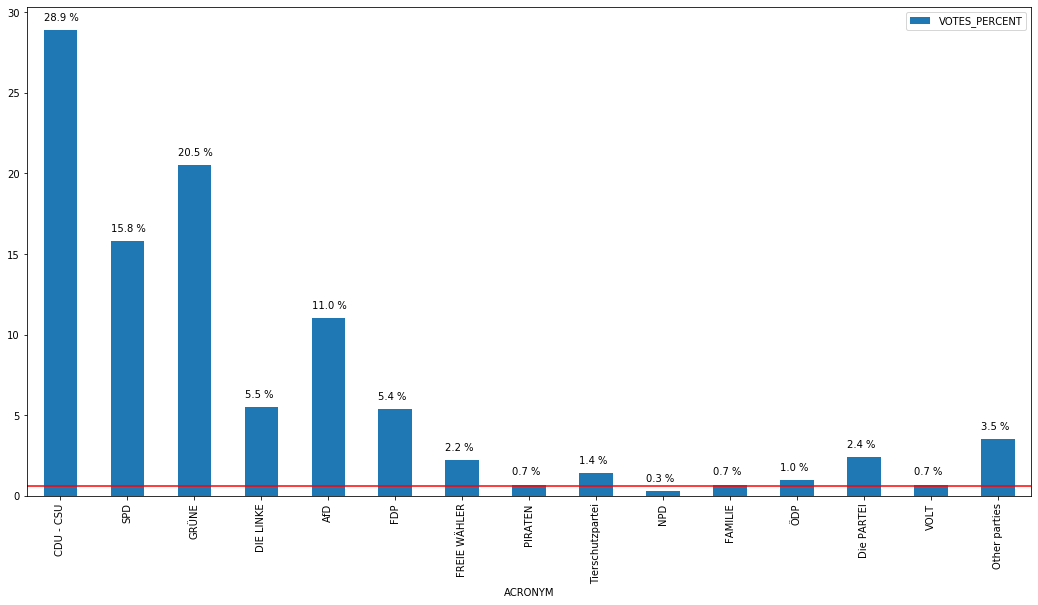

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

results_bar = party_results.plot.bar('ACRONYM', 'VOTES_PERCENT', figsize=(18, 9))
results_bar.axhline(0.6, color='red')
for p in results_bar.patches:
    results_bar.annotate('{} %'.format(p.get_height()), (p.get_x(), p.get_height() + 0.6))

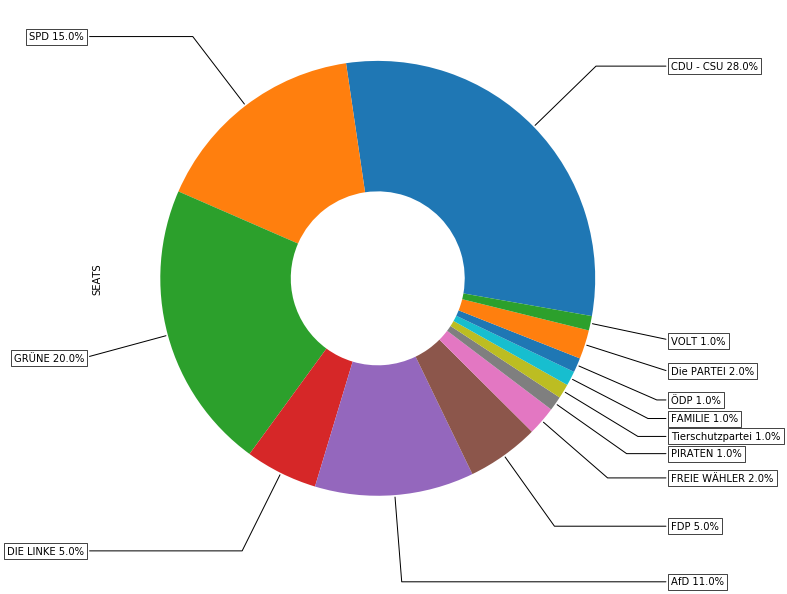

In [130]:
eup_total_seats = 701
eup_german_seats = 96

finished_party_results = party_results[party_results['VOTES_PERCENT'] >= 0.6].copy()

finished_party_results['SEATS'] = round((party_results['VOTES_PERCENT'] / 100) * eup_german_seats)
finished_party_results = finished_party_results.drop('DE90')

seats = finished_party_results.plot.pie(
    y='SEATS',
    labels=None,
    wedgeprops=dict(width=0.6),
    startangle=-10,
    legend=False,
    figsize=(10, 10)
)

# see https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(seats.patches):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
    row = finished_party_results.iloc[i]
    
    seats.annotate(
        "{} {}%".format(row['ACRONYM'], row['SEATS']),
        xy=(x, y),
        xytext=(1.35*np.sign(x), 1.4*y),
        horizontalalignment=horizontalalignment,
        **kw
    )